# 사용할 파이썬 기능을 가져온다

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터를 읽는다

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 데이터탐색(EDA) 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 데이터 전처리

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#결측치 처리
train.Age.mean()

29.69911764705882

In [10]:
train.Age.fillna(29.7, inplace=True)

In [11]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 학습

## 학습 데이터셋 비율을 나눈다

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 학습 데이터, 테스트 데이터

In [15]:
y = train['Survived']
X = train[['SibSp','Parch','Fare','Age']]
# X = train.drop('Survived', axis=1)
# X = train[['Age','SibSp','Parch','Fare']]
# 특징에 대해서는 처리해야됨(문자, 값없는 데이터). 숫자만 머신러닝 가능하다.

In [16]:
pd.get_dummies(train, columns=["Sex"])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.7,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1


In [17]:
pd.get_dummies(train, columns=["Sex"],drop_first=True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.7,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


In [18]:
train.Sex.dtype

dtype('O')

In [19]:
col_list =[]

for i in train.columns:
    if train[i].dtype=='O':
        col_list.append(i)

In [20]:
col_list

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [21]:
col_fnl = col_list[1:]

In [24]:
train2 = pd.get_dummies(train, columns=col_fnl,drop_first=True)

In [27]:
train2.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Ticket_110413,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
oh_col = train2.columns

In [38]:
oh_col[0:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age'], dtype='object')

In [39]:
oh_col_fnl = oh_col.drop(['PassengerId', 'Survived','Name'])

In [40]:
X2 = train2[oh_col_fnl]

## train set, test set 분리

In [64]:
# X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [65]:
X_train.head(3)

,SibSp,Parch,Fare,Age
125,1,0,11.2417,12.00
305,1,2,151.5500,0.92
631,0,0,7.0542,51.00


In [66]:
y_train.head(2)

125    1
305    1
Name: Survived, dtype: int64

## 머신러닝 모듈을 불러온다

### statmodel

In [67]:
import statsmodels.api as sm 

In [68]:
model = sm.OLS(y_train, X_train)

In [69]:
model = model.fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.376
Model:                            OLS   Adj. R-squared (uncentered):              0.373
Method:                 Least Squares   F-statistic:                              106.8
Date:                Sat, 13 Aug 2022   Prob (F-statistic):                    3.48e-71
Time:                        08:34:43   Log-Likelihood:                         -499.63
No. Observations:                 712   AIC:                                      1007.
Df Residuals:                     708   BIC:                                      1026.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SibSp         -0.0133      0.018     -0.731      0.465      -0.049       0.023
Parch          0.0709      0.024      2.930      0.004       0.023       0.118
Fare           0.0031      0.000      8.219      0.000       0.002       0.004
Age            0.0068      0.001     10.054      0.000       0.005       0.008
==============================================================================
Omnibus:                      605.547   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.355
Skew:                           0.431   Prob(JB):                     3.90e-15
Kurtosis:                       1.778   Cond. No.                         89.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 예측

In [71]:
pred = model.predict(X_test)

In [72]:
pred

523    0.550445
778    0.225766
760    0.246857
496    0.597353
583    0.369545
         ...   
100    0.214718
773    0.224168
222    0.371348
495    0.246727
99     0.298566
Length: 179, dtype: float64

## 시각화

<AxesSubplot:xlabel='Survived'>

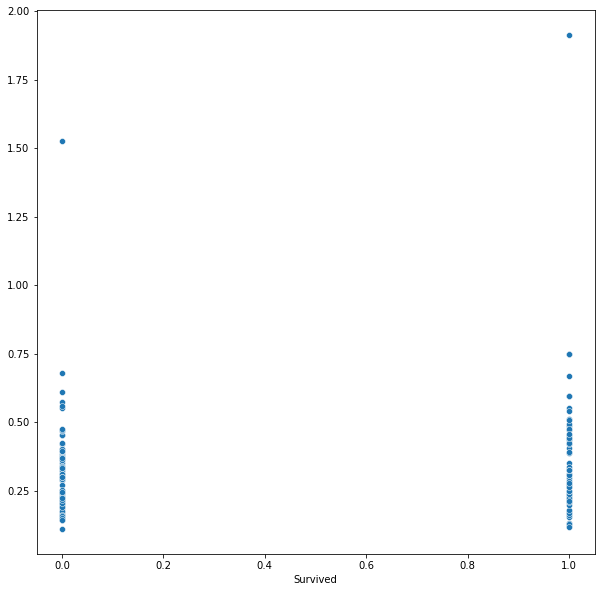

In [73]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test, y=pred)

### sklean의 logisticRegression 모델

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
lr_pred = clf.predict(X_test)

In [76]:
clf.coef_

array([[-0.32560838,  0.11165612,  0.01939584, -0.02316484]])

In [77]:
clf.intercept_

array([-0.27292078])

In [78]:
lr_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [79]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
X_real = test[['SibSp','Parch','Fare','Age']]

In [88]:
X_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SibSp   418 non-null    int64  
 1   Parch   418 non-null    int64  
 2   Fare    417 non-null    float64
 3   Age     332 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 13.2 KB


In [89]:
X_real.Fare.mean()

35.6271884892086

In [90]:
X_real['Fare'].fillna(35.627, inplace=True)

C:\Users\ultra\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [93]:
X_real.Age.mean()

30.272590361445783

In [94]:
X_real['Age'].fillna(30.27, inplace=True)

C:\Users\ultra\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [95]:
real_pred = clf.predict(X_real)

In [96]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [97]:
real_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [98]:
sub = pd.DataFrame(real_pred)

In [99]:
test.shape

(418, 11)

In [100]:
sub.shape

(418, 1)

In [101]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": real_pred
})

In [102]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [103]:
submission.to_csv('ml_sub.csv', index = False)

# 평가 : 정확도

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [105]:
accuracy_score(y_test, lr_pred)

0.664804469273743

In [106]:
confusion_matrix(y_test, lr_pred)

array([[102,   7],
       [ 53,  17]], dtype=int64)

In [107]:
#             예측
# 실제

In [108]:
#스케일을 맞춰준다 : 월급 1, 몸무게 1 기준이 다름 (단위)